In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget

from scipy.io import loadmat
import numpy as np
import neurospyke as ns
import json
import os

In [14]:
f = open('./settings.json')
settings = json.load(f)
f.close()

sampling_frequency = settings['sampling_frequency']
sampling_time = 1 / sampling_frequency
resampling_frequency = settings['resampling_frequency']
resampling_time = 1 / resampling_frequency

frequency_ratio = sampling_frequency / resampling_frequency

signal_duration = settings['signal_duration']

group = settings['group']
subject = settings['subject']
conditions = settings['conditions']
areas = list(settings['areas'].keys())
areas_labels = [settings['areas'][area]['label'] for area in areas]
n_channels = settings['n_channels']
n_stimuli = settings['n_stimuli']

bin_duration = settings['IFR_bin_duration']
trial_duration = settings['trial_duration']
trial_duration_view = settings['trial_duration_view']
trial_samples = np.floor(trial_duration_view * sampling_frequency).astype(np.int_)

In [3]:
# Settings
conditions_idx = 0
areas_idx = 0

In [4]:
data = loadmat(os.path.join('./output', group, subject, subject + '.mat'))
spike_trains = data['spike_trains']

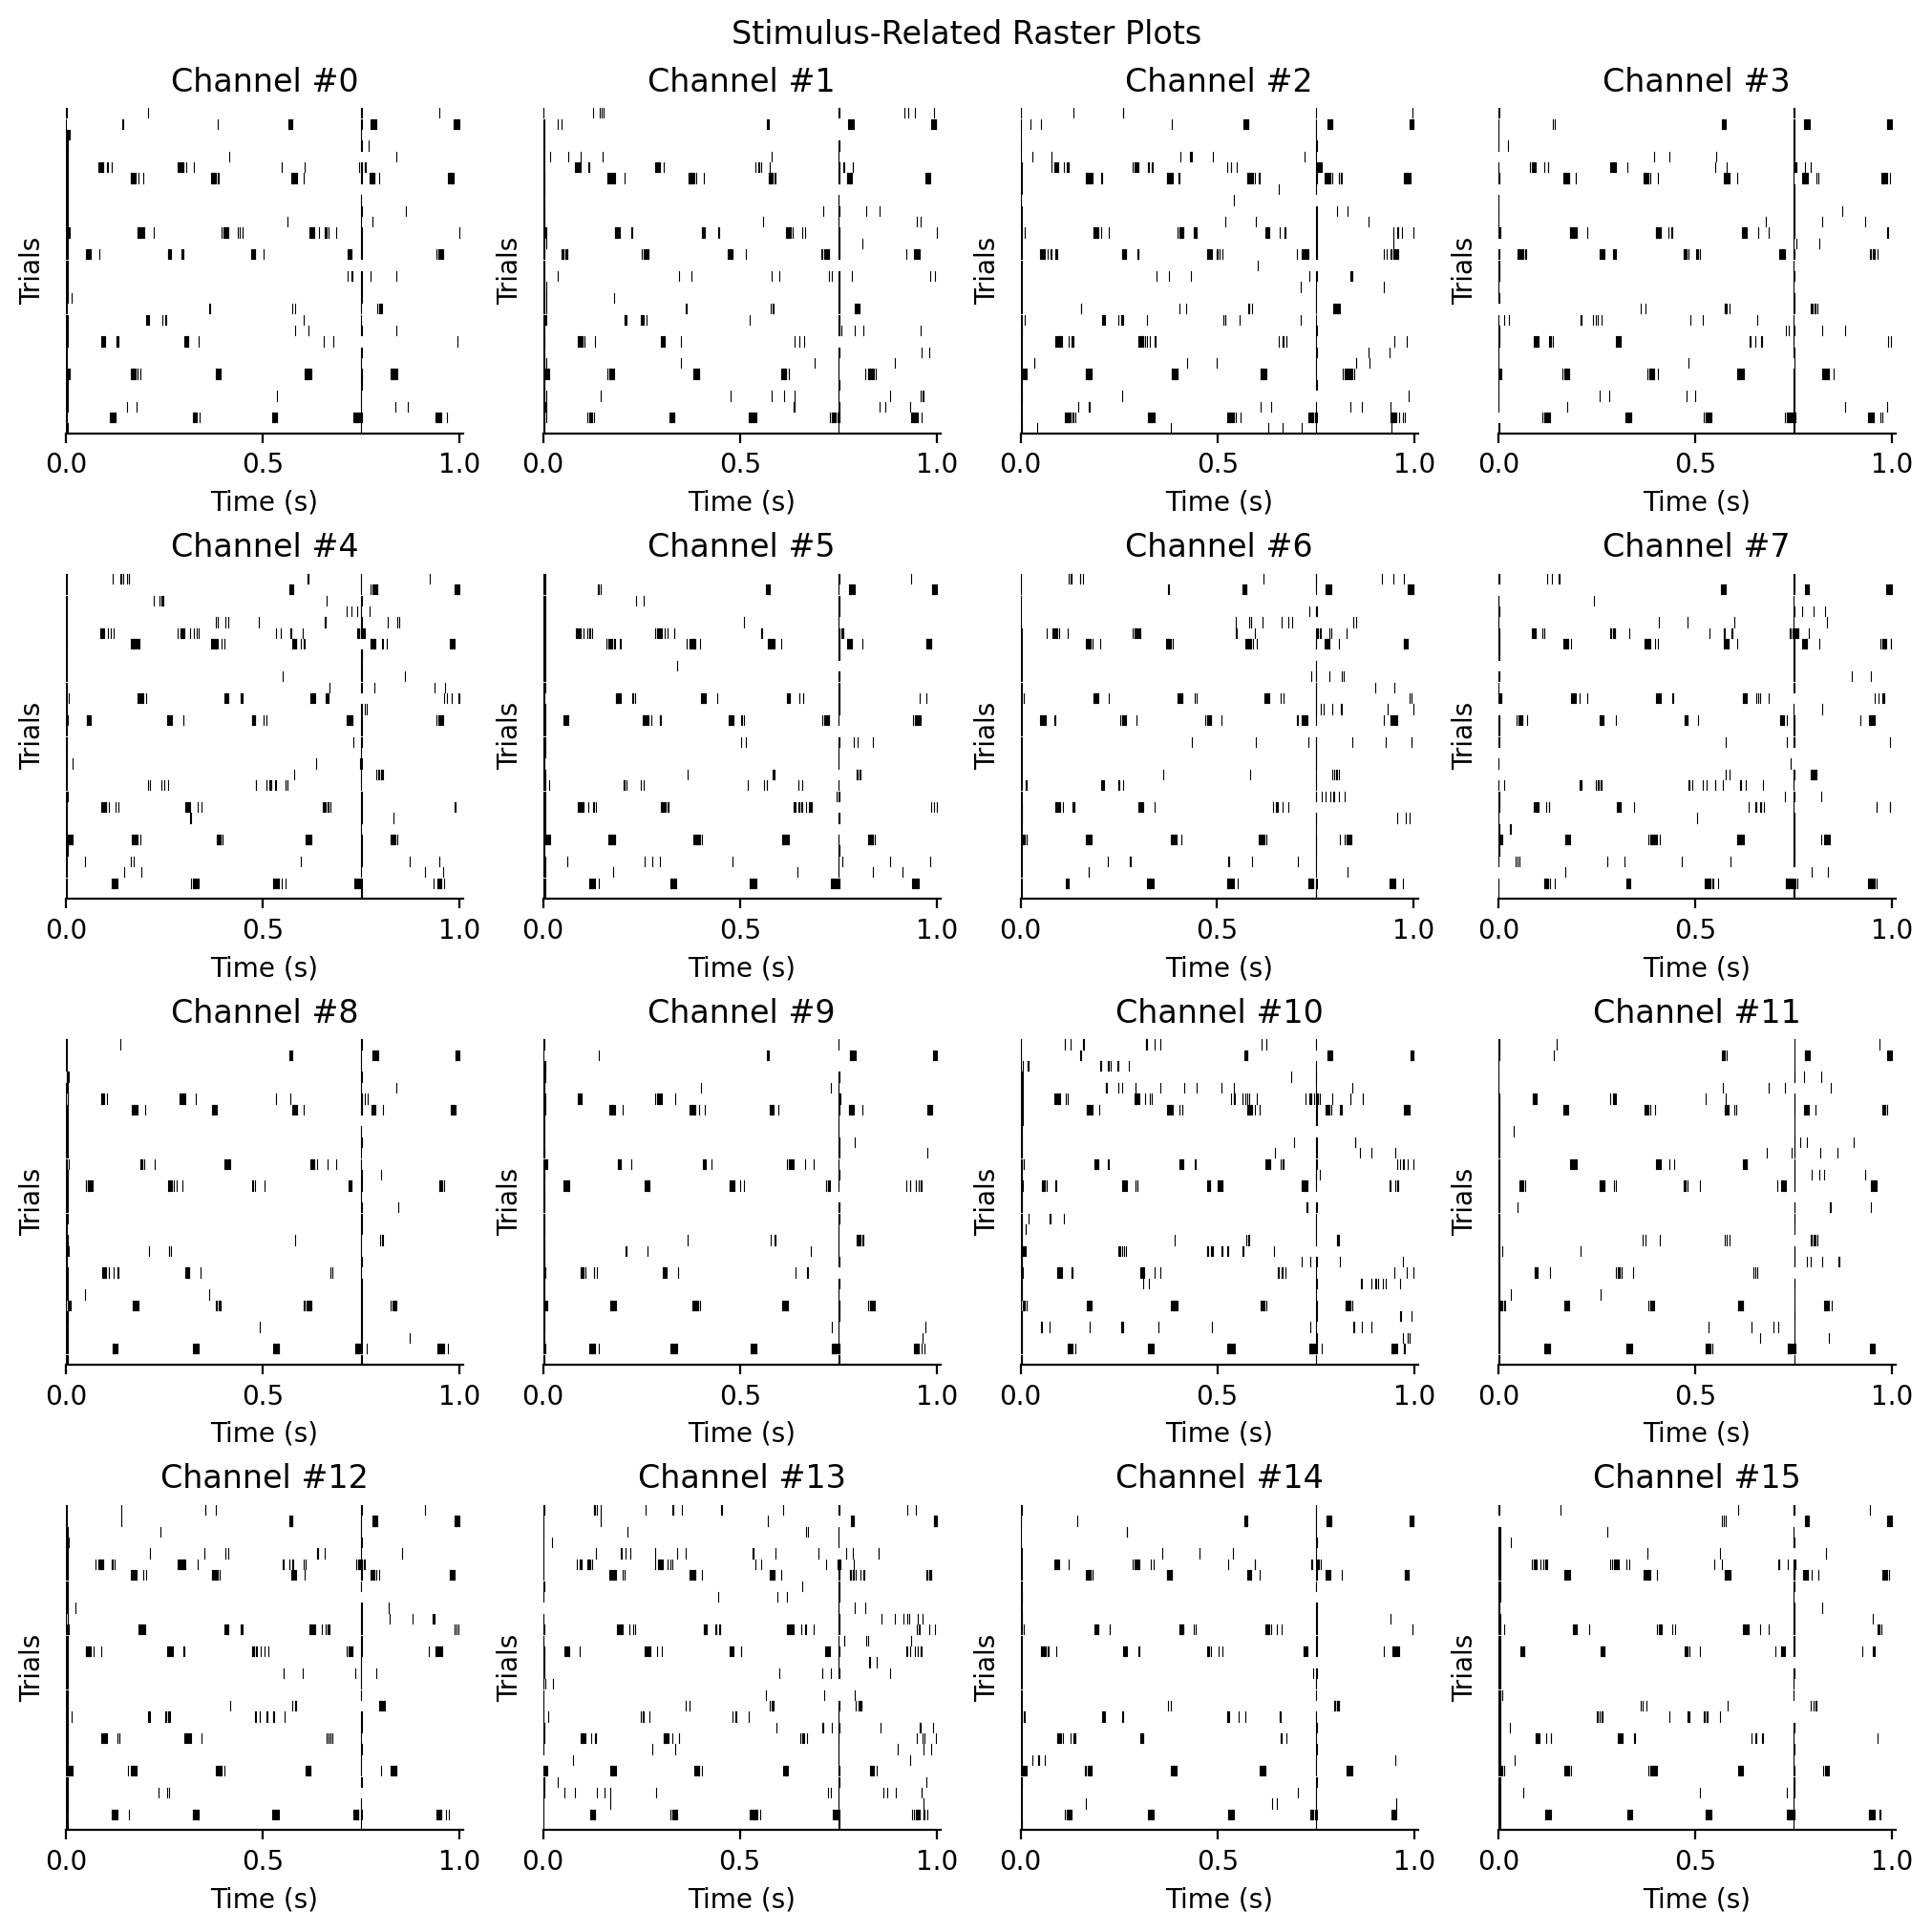

In [16]:
ns.visualization.plot_raster(spike_trains[conditions_idx, areas_idx, :, :, 0:trial_samples], sampling_time, n_cols=4, is_train=True, figsize=[10, 10])